In [1]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
#from alvra_tools.channels_res import *
from alvra_tools.channels_raw import *
from alvra_tools import errfunc

/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
channel_BS_pulse_ids

'data/SLAAR11-LMOT-M451:ENC_1_BS/pulse_id'

In [4]:
#scan_name ="YAG_FEL0.2_2605_021"
scan_name ="YAG_with_scansJF"

#DIR = "/sf/alvra/data/p17807/res/scan_data/" + scan_name + "/"
DIR = "/sf/alvra/data/p17807/raw/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p17807/res/scan_info/"

In [5]:
!ls -la -rt $DIR


!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 9281154
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:43 YAG_with_scansJF_step0000.JF06T08V01.h5
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:43 YAG_with_scansJF_step0001.JF06T08V01.h5
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:43 YAG_with_scansJF_step0002.JF06T08V01.h5
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:43 YAG_with_scansJF_step0003.JF06T08V01.h5
-rw-r--r--. 1 root  p17807     10472 May 26 22:43 YAG_with_scansJF_step0000.BSREAD_CA.h5
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:43 YAG_with_scansJF_step0004.JF06T08V01.h5
-rw-r--r--. 1 root  p17807      9656 May 26 22:43 YAG_with_scansJF_step0001.BSREAD_CA.h5
-rw-r--r--. 1 root  p17807      9920 May 26 22:43 YAG_with_scansJF_step0002.BSREAD_CA.h5
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:43 YAG_with_scansJF_step0005.JF06T08V01.h5
-rw-r--r--. 1 root  p17807      9896 May 26 22:43 YAG_with_scansJF_step0003.BSREAD_CA.h5
-rw-r--r--. 1 17807 p17807 838941200 May 26 22:44 YAG_with_scansJF_step0006.JF06T08V01.h5


In [7]:
print (channel_BS_pulse_ids)

json_file = DIR_json + scan_name + "_scan_info.json"

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 4
print ("Processing",numFiles,"files")
print (json_file)

Pump_probe = []
err_pump_probe =[]
Delay_mm = []

Izero_FEL_mean = []
err_Izero_FEL_mean = []
Izero_FEL_all = []
Izero_FEL_all_filter = []

PIPS_mean = []
BAM_mean = []
BAM_error = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])
    exists = os.path.isfile(filename)

    if (exists):
        print("step",i+1,"of",numFiles,": Processing %s" % (str(data['scan_files'][i][0])))
        (Laser_pump, Laser_unpump, Laser_ref_pump, Laser_ref_unpump, Izero_FEL, PIPS, delay, pids_loop) = \
        load_YAG_events(str(data['scan_files'][i][0]))
        
        Pump_probe.append(-np.log10((Laser_pump.mean()/Laser_ref_pump.mean()) / (Laser_unpump.mean()/ Laser_ref_unpump.mean())))
        
        
#        threshold_FEL = Izero_FEL > 0.1
#        condition_FEL = Izero_FEL > np.median(Izero_FEL)-2*(np.std(Izero_FEL))
#        condition_laser_pump = ((Laser_pump > 10) & (Laser_ref_pump > 10))
#        condition_laser_unpump = ((Laser_unpump > 10) & (Laser_ref_unpump > 10))
        
#        Laser_pump = Laser_pump[threshold_FEL & condition_FEL & condition_laser_pump & condition_laser_unpump]
#        Laser_unpump = Laser_unpump[threshold_FEL & condition_FEL & condition_laser_pump & condition_laser_unpump]
#        Laser_ref_pump = Laser_ref_pump[threshold_FEL & condition_FEL & condition_laser_pump & condition_laser_unpump]
#        Laser_ref_unpump = Laser_ref_unpump[threshold_FEL & condition_FEL & condition_laser_pump & condition_laser_unpump]
#        Izero_FEL_filter = Izero_FEL[threshold_FEL & condition_FEL & condition_laser_pump & condition_laser_unpump]
        
#        Laser_diff = -np.log10((Laser_pump/Laser_ref_pump) / (Laser_unpump/ Laser_ref_unpump))
#        Laser_diff = -np.log10((Laser_pump) / (Laser_unpump))
    
#        Pump_probe.append(Laser_diff.mean())
#        err_pump_probe.append(Laser_diff.std() / np.sqrt(Laser_diff.size))
        
#        Izero_FEL_all.append(Izero_FEL)
#        Izero_FEL_all_filter.append(Izero_FEL_filter)
        
#        Izero_FEL_mean.append(Izero_FEL.mean())
#        err_Izero_FEL_mean.append(Izero_FEL.std() / np.sqrt(Izero_FEL.size))
        
        PIPS_mean.append(PIPS.mean())
        #Delay_mm.append(delay.mean())
        Delay_mm.append(delay[0])
#        BAM_mean.append(BAM.mean())
#        BAM_error.append(BAM.std() / np.sqrt(BAM.size))
        
Pump_probe = np.asarray(Pump_probe)
err_pump_probe = np.asarray(err_pump_probe)

Izero_FEL_mean = np.asarray(Izero_FEL_mean)
err_Izero_FEL_mean = np.asarray(err_Izero_FEL_mean)

Delay_mm = np.asarray(Delay_mm)
BAM_mean = np.asarray(BAM_mean)
BAM_error = np.asarray(BAM_error)

data/SLAAR11-LMOT-M451:ENC_1_BS/pulse_id
Processing 11 files
/sf/alvra/data/p17807/res/scan_info/YAG_with_scansJF_scan_info.json
step 1 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0000.BSREAD.h5
step 2 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0001.BSREAD.h5
step 3 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0002.BSREAD.h5
step 4 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0003.BSREAD.h5
step 5 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0004.BSREAD.h5
step 6 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0005.BSREAD.h5
step 7 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_with_scansJF/YAG_with_scansJF_step0006.BSREAD.h5
step 8 of 11 : Processing /sf/alvra/data/p17807/raw/scan_data/YAG_

<IPython.core.display.Javascript object>


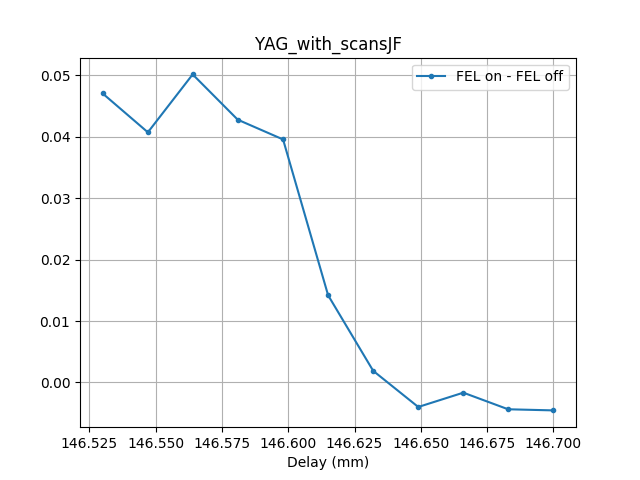

In [11]:
# Plot pump probe signal as a function of delay (stage mm)

#savedir = "/das/work/p17/p17569/Beamline/"
plt.figure()
plt.plot(Delay_mm, Pump_probe, label="FEL on - FEL off",marker='.')

#low_err = Pump_probe - err_pump_probe
#high_err = Pump_probe + err_pump_probe
#plt.fill_between(np.squeeze(Delay_mm), low_err, high_err, color='lightblue')

plt.title(scan_name)
plt.xlabel("Delay (mm)")
plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig(savedir + 'LAMcheck_026')

In [12]:
t0_Time_air = 146.68 # this is from Friday, do not change
Delay_ps = 2* (Delay_mm - t0_Time_air)*3.333   # factor of 2 in delay due to the delay stage

In [13]:
#RUN THIS FOR THE FIT !!!

Delay_mm_toFit = Delay_mm.copy()
Delay_ps_toFit = Delay_ps.copy()
Pump_probe_toFit = Pump_probe.copy()

In [14]:
Pump_probe_toFit

array([ 0.04707408,  0.04073276,  0.05016328,  0.04278817,  0.03957108,
        0.01418451,  0.00188566, -0.00399897, -0.001668  , -0.00437306,
       -0.00455566])

In [15]:
# Now fit IN SPACE with error funciton (defined above)
parameters,extras = curve_fit(errfunc, Delay_mm_toFit, Pump_probe_toFit, p0 = [-0.01, 0.04, 146.6, 0.1])

print("Position t0 =",np.round(parameters[2],5),"mm")
print("Width =",np.abs(np.round(parameters[3],3))*1000,"um")

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [25]:
# Now fit IN TIME with error funciton (defined above)
parameters,extras = curve_fit(errfunc, Delay_ps_toFit, Pump_probe_toFit, p0 = [0.01, 0.03, -250, 100])

print("Position t0 =",np.round(parameters[2],5)*1000,"fs")
print("Width =",np.abs(np.round(parameters[3],3))*1000,"fs")

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

<IPython.core.display.Javascript object>


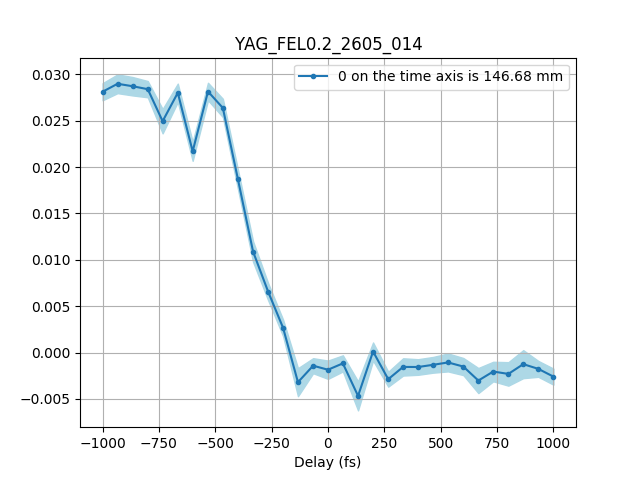

In [18]:
# Plot pump probe signal as a function of time (fs)

#savedir = "/das/work/p17/p17569/Beamline/"


plt.figure()
plt.plot((Delay_ps)*1000, Pump_probe, label="0 on the time axis is %s mm" % t0_Time_air,marker='.')   
plt.plot(label='0 in time is')

low_err = Pump_probe - err_pump_probe
high_err = Pump_probe + err_pump_probe
plt.fill_between(np.squeeze((Delay_ps)*1000), low_err, high_err, color='lightblue')

plt.title(scan_name)
plt.xlabel("Delay (fs)")
plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig('Timescan_7_diode')

<IPython.core.display.Javascript object>


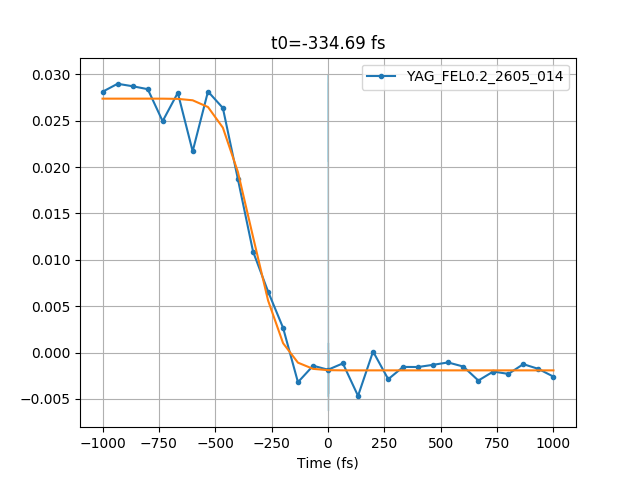

In [19]:
#... and the plot with the fit curve

#savedir = "/das/work/p17/p17569/Beamline/"

plt.figure()

plt.plot(Delay_ps_toFit*1000, Pump_probe_toFit, label=f"{scan_name}",marker='.')
plt.plot(Delay_ps_toFit*1000, errfunc(Delay_ps_toFit,*parameters))

#low_err= signal_norm - err_signal_norm
#high_err= signal_norm + err_signal_norm

plt.fill_between(Delay_ps_toFit, low_err, high_err, color='lightblue')
plt.title('t0=' + str(np.round(parameters[2], 5)*1000) + ' fs' )
plt.grid()
plt.xlabel("Time (fs)")
plt.legend(loc="best")
plt.show()
#plt.savefig(savedir + 'scan_YAG_007')

In [20]:
time_zero = 146.56     #this is in mm from the delay scans

desidered_delay = 0.600
#choose this in ps

delay_to_set = (100/(2*333))*desidered_delay + time_zero        #factor of 2 because of the delay stage

desidered_delay + time_zero
print ("To be at",desidered_delay,"ps, put the laser pump delay stage to",np.round(delay_to_set,4),"mm")

To be at 0.6 ps, put the laser pump delay stage to 146.6501 mm


In [34]:
offset_space = 10       # this is in um

offset_time = 2*(offset_space * 1e-6)/3e8/1e-15            #factor of 2 because of the delay stage, results in fs
print ("An offset of",offset_space,"um corresponds to an offset of",np.round(offset_time,4),"fs")

An offset of 10 um corresponds to an offset of 66.6667 fs


In [22]:
offset_time = 5000      # this is in fs

offset_space = 3e8 * (offset_time * 1e-15)/2/1e-6          #factor of 2 because of the delay stage, results in um
print ("An offset of",offset_time,"fs corresponds to an offset of",np.round(offset_space,4),"um")

An offset of 5000 fs corresponds to an offset of 750.0 um
